In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime as dt
from citipy import citipy
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.00, high = 90.00, size = 1500)
lngs = np.random.uniform(low = -180.00, high = 180.00, size = 1500)
lat_lngs = zip(lats,lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Create a list for holding the cities.

cities =[]

#Identify the nearest city for each lattitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # check for the city if already exists
    if city not in cities:
        cities.append(city)


In [5]:
# Create an empty list to hold the weather data.
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i%50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = dt.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print(f"City {city} not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | kruisfontein
Processing Record 4 of Set 1 | energetik
Processing Record 5 of Set 1 | constitucion
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | port lincoln
Processing Record 9 of Set 1 | verdalsora
City verdalsora not found. Skipping...
Processing Record 10 of Set 1 | ranong
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | orlik
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | comodoro rivadavia
Processing Record 17 of Set 1 | puerto suarez
Processing Record 18 of Set 1 | isla mujeres
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | morgan city
Processing Record 22 of Set 1 | sorland
Processing Record 23 of Set 1 | 

Processing Record 31 of Set 4 | aksarka
Processing Record 32 of Set 4 | oktyabrskiy
Processing Record 33 of Set 4 | tuy hoa
Processing Record 34 of Set 4 | neverkino
Processing Record 35 of Set 4 | bengkulu
Processing Record 36 of Set 4 | atasu
Processing Record 37 of Set 4 | mizque
Processing Record 38 of Set 4 | dao
Processing Record 39 of Set 4 | half moon bay
Processing Record 40 of Set 4 | boulsa
Processing Record 41 of Set 4 | matara
Processing Record 42 of Set 4 | codrington
Processing Record 43 of Set 4 | sioux lookout
Processing Record 44 of Set 4 | verkhoyansk
Processing Record 45 of Set 4 | luderitz
Processing Record 46 of Set 4 | adrar
Processing Record 47 of Set 4 | buseresere
Processing Record 48 of Set 4 | airai
Processing Record 49 of Set 4 | pacifica
Processing Record 50 of Set 4 | niquero
Processing Record 1 of Set 5 | porto novo
Processing Record 2 of Set 5 | makokou
Processing Record 3 of Set 5 | talnakh
Processing Record 4 of Set 5 | ilulissat
Processing Record 5 o

Processing Record 15 of Set 8 | kirksville
Processing Record 16 of Set 8 | tocopilla
Processing Record 17 of Set 8 | hambantota
Processing Record 18 of Set 8 | acari
Processing Record 19 of Set 8 | vila velha
Processing Record 20 of Set 8 | marsa matruh
Processing Record 21 of Set 8 | nantucket
Processing Record 22 of Set 8 | hobyo
Processing Record 23 of Set 8 | posse
Processing Record 24 of Set 8 | talara
Processing Record 25 of Set 8 | ugoofaaru
Processing Record 26 of Set 8 | bilibino
Processing Record 27 of Set 8 | taoudenni
Processing Record 28 of Set 8 | sentyabrskiy
City sentyabrskiy not found. Skipping...
Processing Record 29 of Set 8 | ginda
Processing Record 30 of Set 8 | goroka
Processing Record 31 of Set 8 | champerico
Processing Record 32 of Set 8 | zonguldak
Processing Record 33 of Set 8 | butig
Processing Record 34 of Set 8 | wulanhaote
City wulanhaote not found. Skipping...
Processing Record 35 of Set 8 | kenai
Processing Record 36 of Set 8 | svetlyy
Processing Record 

Processing Record 47 of Set 11 | kieta
Processing Record 48 of Set 11 | curup
Processing Record 49 of Set 11 | norman wells
Processing Record 50 of Set 11 | jomalig
City jomalig not found. Skipping...
Processing Record 1 of Set 12 | black river
Processing Record 2 of Set 12 | moroni
Processing Record 3 of Set 12 | linguere
Processing Record 4 of Set 12 | cortes
Processing Record 5 of Set 12 | aykhal
Processing Record 6 of Set 12 | aguimes
Processing Record 7 of Set 12 | henties bay
Processing Record 8 of Set 12 | kolokani
Processing Record 9 of Set 12 | ngaoundere
Processing Record 10 of Set 12 | olinda
Processing Record 11 of Set 12 | baturaja
Processing Record 12 of Set 12 | salamiyah
Processing Record 13 of Set 12 | basyanovskiy
City basyanovskiy not found. Skipping...
Processing Record 14 of Set 12 | husavik
Processing Record 15 of Set 12 | bayan
Processing Record 16 of Set 12 | formosa
Processing Record 17 of Set 12 | mayo
Processing Record 18 of Set 12 | moree
Processing Record 1

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,2.28,71,1,2.98,RU,2022-03-19 19:44:17
1,Hithadhoo,-0.6000,73.0833,83.52,71,8,17.00,MV,2022-03-19 19:51:40
2,Kruisfontein,-34.0033,24.7314,68.88,95,0,4.45,ZA,2022-03-19 19:51:40
3,Energetik,51.7445,58.7934,4.77,99,83,5.48,RU,2022-03-19 19:51:41
4,Constitucion,-35.3333,-72.4167,67.48,48,100,14.47,CL,2022-03-19 19:51:41
5,Bluff,-46.6000,168.3333,47.80,88,42,7.38,NZ,2022-03-19 19:51:41
6,Carnarvon,-24.8667,113.6333,77.07,88,100,9.22,AU,2022-03-19 19:51:42
7,Port Lincoln,-34.7333,135.8667,63.05,89,39,10.22,AU,2022-03-19 19:51:42
8,Ranong,9.9658,98.6348,76.78,90,100,3.04,TH,2022-03-19 19:51:43
9,Castro,-24.7911,-50.0119,74.23,76,82,3.94,BR,2022-03-19 19:51:43


In [9]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df =city_data_df[new_column_order]

In [10]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2022-03-19 19:44:17,64.3833,-173.3000,2.28,71,1,2.98
1,Hithadhoo,MV,2022-03-19 19:51:40,-0.6000,73.0833,83.52,71,8,17.00
2,Kruisfontein,ZA,2022-03-19 19:51:40,-34.0033,24.7314,68.88,95,0,4.45
3,Energetik,RU,2022-03-19 19:51:41,51.7445,58.7934,4.77,99,83,5.48
4,Constitucion,CL,2022-03-19 19:51:41,-35.3333,-72.4167,67.48,48,100,14.47
...,...,...,...,...,...,...,...,...,...
522,Odweyne,SO,2022-03-19 20:05:30,9.4092,45.0640,74.52,41,6,4.45
523,Kuching,MY,2022-03-19 20:00:33,1.5500,110.3333,75.42,94,40,0.00
524,San Roque,ES,2022-03-19 20:05:30,36.2107,-5.3842,57.38,84,46,20.11
525,Sao Paulo De Olivenca,BR,2022-03-19 20:05:31,-3.3783,-68.8725,76.68,93,97,4.21


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

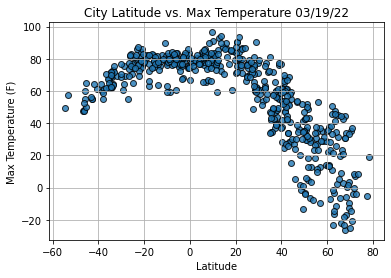

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

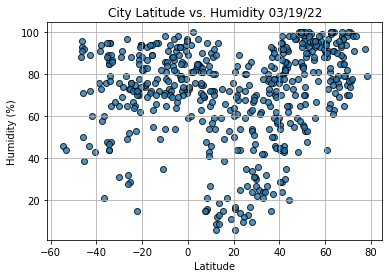

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

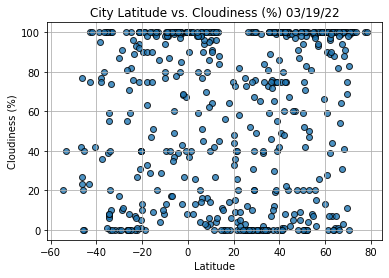

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

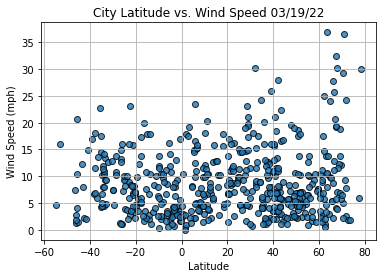

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()